In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import layers
import keras

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Fifa_WC22_cleaned.csv')
df

,Date Created,Number of Likes,Source of Tweet,Tweet,Sentiment,Time,WeekDay,Month,Date,Hour,Tweet_cleaned
0,2022-11-20 23:59:21+00:00,4,Twitter Web App,What are we drinking today @TucanTribe \n@MadB...,neutral,23:59:21,Sun,11,2022-11-20,23,drinking today TucanTribe MadBears_ lkinc_algo...
1,2022-11-20 23:59:01+00:00,3,Twitter for iPhone,Amazing @CanadaSoccerEN #WorldCup2022 launch ...,positive,23:59:01,Sun,11,2022-11-20,23,Amazing CanadaSoccerEN WorldCup2022 launch vid...
2,2022-11-20 23:58:41+00:00,1,Twitter for iPhone,Worth reading while watching #WorldCup2022 htt...,positive,23:58:41,Sun,11,2022-11-20,23,Worth reading watching WorldCup2022
3,2022-11-20 23:58:33+00:00,1,Twitter Web App,Golden Maknae shinning bright\n\nhttps://t.co/...,positive,23:58:33,Sun,11,2022-11-20,23,Golden Maknae shinning brightJeonJungkook Jung...
4,2022-11-20 23:58:28+00:00,0,Twitter for Android,"If the BBC cares so much about human rights, h...",negative,23:58:28,Sun,11,2022-11-20,23,"BBC cares much human rights, homosexual rights..."
...,...,...,...,...,...,...,...,...,...,...,...
22519,2022-11-20 00:00:21+00:00,1,Twitter Web App,Here We go World cup 2022 #WorldCup2022,positive,00:00:21,Sun,11,2022-11-20,0,go World cup 2022 WorldCup2022
22520,2022-11-20 00:00:03+00:00,0,DenetPro,Anderlecht confirms former Viborg FF's Jesper ...,neutral,00:00:03,Sun,11,2022-11-20,0,Anderlecht confirms former Viborg FF's Jesper ...
22521,2022-11-20 00:00:01+00:00,2,Twitter for iPhone,Great thread to read before the start of #Worl...,positive,00:00:01,Sun,11,2022-11-20,0,Great thread read start WorldCup2022
22522,2022-11-20 00:00:00+00:00,11,Twitter Web App,Raphinha wants Brazil to be united at the #Wor...,positive,00:00:00,Sun,11,2022-11-20,0,Raphinha wants Brazil united WorldCup2022 👊🇧🇷


In [3]:
df.drop(['Date Created', 'Number of Likes', 'Source of Tweet', 'Tweet', 'Time', 'WeekDay', 'Month', 'Date', 'Hour'], axis = 1, inplace = True)
df.head()

,Sentiment,Tweet_cleaned
0,neutral,drinking today TucanTribe MadBears_ lkinc_algo...
1,positive,Amazing CanadaSoccerEN WorldCup2022 launch vid...
2,positive,Worth reading watching WorldCup2022
3,positive,Golden Maknae shinning brightJeonJungkook Jung...
4,negative,"BBC cares much human rights, homosexual rights..."


In [4]:
le = LabelEncoder()
df['Labels'] = le.fit_transform(df['Sentiment'])
df.head()

,Sentiment,Tweet_cleaned,Labels
0,neutral,drinking today TucanTribe MadBears_ lkinc_algo...,1
1,positive,Amazing CanadaSoccerEN WorldCup2022 launch vid...,2
2,positive,Worth reading watching WorldCup2022,2
3,positive,Golden Maknae shinning brightJeonJungkook Jung...,2
4,negative,"BBC cares much human rights, homosexual rights...",0


In [5]:
def removeNonAlpha(sentence):
    words = sentence.split(' ')
    new_words = []
    for w in words:
        if w.isalpha() == True:
            new_words.append(w)
    new_sentence = ' '.join(new_words)
    return new_sentence

In [6]:
df['Tweets_onlyAlpha'] = df['Tweet_cleaned'].apply(removeNonAlpha)
df.head()

,Sentiment,Tweet_cleaned,Labels,Tweets_onlyAlpha
0,neutral,drinking today TucanTribe MadBears_ lkinc_algo...,1,drinking today TucanTribe
1,positive,Amazing CanadaSoccerEN WorldCup2022 launch vid...,2,Amazing CanadaSoccerEN launch video Shows much...
2,positive,Worth reading watching WorldCup2022,2,Worth reading watching
3,positive,Golden Maknae shinning brightJeonJungkook Jung...,2,Golden Maknae shinning brightJeonJungkook Jung...
4,negative,"BBC cares much human rights, homosexual rights...",0,BBC cares much human homosexual women rights s...


In [7]:
X = df['Tweets_onlyAlpha']
Y = df['Labels']

In [29]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size = 0.25, random_state = 40, stratify = Y)
len(Xtrain), len(Xtest)

(16893, 5631)

In [30]:
np.unique(Ytrain, return_counts = True), np.unique(Ytest, return_counts = True), 

((array([0, 1, 2]), array([4338, 6188, 6367])),
 (array([0, 1, 2]), array([1446, 2063, 2122])))

In [31]:
tokenizer = Tokenizer(num_words = 1000, oov_token = '<OOV>')
tokenizer.fit_on_texts(Xtrain)

In [32]:
word_index = tokenizer.word_index
len(word_index)

19567

In [33]:
max_length = max([len(sent.split(' ')) for sent in Xtrain])
max_length

33

In [34]:
train_sequences = tokenizer.texts_to_sequences(Xtrain)
train_padded_sequences = pad_sequences(train_sequences, maxlen = max_length, padding = 'post')

In [35]:
test_sequences = tokenizer.texts_to_sequences(Xtest)
test_padded_sequences = pad_sequences(test_sequences, maxlen = max_length, padding = 'post')

In [41]:
model = keras.Sequential([
    layers.Embedding(input_dim = len(word_index) + 1, output_dim = 16, input_length = max_length),
    
    layers.Bidirectional(layer = layers.LSTM(units = 100, return_sequences = True)),
    layers.Dropout(0.5),
    
    layers.Bidirectional(layer = layers.LSTM(units = 100)),
    layers.Dropout(0.5),

  
    
    layers.Dense(units = 64, activation = 'relu'),
    layers.Dropout(0.5),
    layers.Dense(units = 3, activation = 'softmax')
    
])

model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = 'accuracy')
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 33, 16)            313088    
                                                                 
 bidirectional_9 (Bidirectio  (None, 33, 200)          93600     
 nal)                                                            
                                                                 
 dropout_12 (Dropout)        (None, 33, 200)           0         
                                                                 
 bidirectional_10 (Bidirecti  (None, 200)              240800    
 onal)                                                           
                                                                 
 dropout_13 (Dropout)        (None, 200)               0         
                                                                 
 dense_6 (Dense)             (None, 64)               

In [42]:
hist = model.fit(train_padded_sequences, Ytrain, epochs = 30, validation_data = (test_padded_sequences, Ytest))

Epoch 1/30
528/528 [==============================] - 17s 21ms/step - loss: 0.9573 - accuracy: 0.4856 - val_loss: 0.8072 - val_accuracy: 0.6200
Epoch 2/30
528/528 [==============================] - 8s 15ms/step - loss: 0.7679 - accuracy: 0.6524 - val_loss: 0.7572 - val_accuracy: 0.6523
Epoch 3/30
528/528 [==============================] - 8s 14ms/step - loss: 0.7153 - accuracy: 0.6795 - val_loss: 0.7443 - val_accuracy: 0.6574
Epoch 4/30
528/528 [==============================] - 8s 15ms/step - loss: 0.6908 - accuracy: 0.6949 - val_loss: 0.7404 - val_accuracy: 0.6517
Epoch 5/30
528/528 [==============================] - 8s 15ms/step - loss: 0.6770 - accuracy: 0.7008 - val_loss: 0.7449 - val_accuracy: 0.6631
Epoch 6/30
528/528 [==============================] - 8s 15ms/step - loss: 0.6627 - accuracy: 0.7024 - val_loss: 0.7415 - val_accuracy: 0.6542
Epoch 7/30
528/528 [==============================] - 8s 15ms/step - loss: 0.6489 - accuracy: 0.7151 - val_loss: 0.7694 - val_accuracy: 0.654

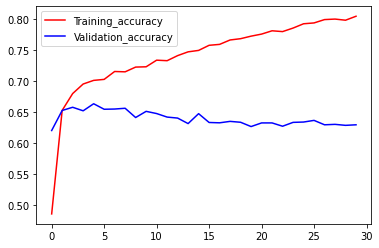

In [43]:
train_acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']

epochs = range(len(train_acc))
plt.plot(epochs, train_acc, color = 'r', label = 'Training_accuracy')
plt.plot(epochs, val_acc, color = 'b', label = 'Validation_accuracy')
plt.legend()
plt.show()